**DATA WRANGLING AND OBSERVATION**

---

In [1]:
#Import necessary modules
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold
from keras.constraints import maxnorm
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Using TensorFlow backend.


In [2]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt


In [4]:
# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/energydata complete.csv')

In [5]:
# fix random seed for reproducibility
seed=7
np.random.seed(seed)

In [6]:
# Extend the number of viewable columns

pd.options.display.max_columns = 30

In [7]:
# View the dataset
"head:", data.head(), \
"tail:", data.tail()

('head:',
                   date  Appliances  lights     T1       RH_1    T2       RH_2  \
 0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
 1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
 2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
 3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
 4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
 
       T3       RH_3         T4       RH_4         T5   RH_5        T6  \
 0  19.79  44.730000  19.000000  45.566667  17.166667  55.20  7.026667   
 1  19.79  44.790000  19.000000  45.992500  17.166667  55.20  6.833333   
 2  19.79  44.933333  18.926667  45.890000  17.166667  55.09  6.560000   
 3  19.79  45.000000  18.890000  45.723333  17.166667  55.09  6.433333   
 4  19.79  45.000000  18.890000  45.530000  17.200000  55.09  6.366667   
 
         RH_6         T7       RH_7    T8       RH

In [8]:
# check out the dimension of the dataset
data.shape

(19735, 29)

In [9]:
# return an array of column names
data.columns.values

array(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7',
       'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'], dtype=object)

In [10]:
#View information about the columns

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [11]:
#Data Cleaning - check for any missing values or errors in the dataset

data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [ ]:
# Making a list of possible missing value types
missing_values = ["n/a", "na", "--"]
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/energydata complete.csv", na_values = missing_values)

In [13]:
# checking non-missing values
data.notnull()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
19731,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
19732,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
19733,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


The Dataset does not require any correction because there are no missing values

**EXPLORATORY DATA ANALYSIS**

---

In [14]:
# obtain descriptive summary of data statistics
"Statistics:", data.describe()

('Statistics:',
          Appliances        lights            T1          RH_1            T2  \
 count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
 mean      97.694958      3.801875     21.686571     40.259739     20.341219   
 std      102.524891      7.935988      1.606066      3.979299      2.192974   
 min       10.000000      0.000000     16.790000     27.023333     16.100000   
 25%       50.000000      0.000000     20.760000     37.333333     18.790000   
 50%       60.000000      0.000000     21.600000     39.656667     20.000000   
 75%      100.000000      0.000000     22.600000     43.066667     21.500000   
 max     1080.000000     70.000000     26.260000     63.360000     29.856667   
 
                RH_2            T3          RH_3            T4          RH_4  \
 count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
 mean      40.420420     22.267611     39.242500     20.855335     39.026904   
 std        4.069813  

**Temperature Variation**

Temperatures (in degree celsius) inside the house vary between 14.89 degrees and 29.85 degrees while temperatures (in degree celsius) outside vary between -6.06 degrees and 28.29 degrees.

Observation: The variance is because the sensors outside will read temperatures different from room temperatures read from the sensors indoors

**Humidity Variation**

Humidity of the rooms inside the house varies except the bathroom (column RH_5) varies between 20.60% to 63.35%.

Humidity of the bathroom varies between 29.82% to 96.32% while the humidity outside varies between 1% and 99.9%

Observation: The variance of humidity in the bathroom and outside is because of the presence of more exposure to water vapour when people shower (whether with hot or cold water) and the weather (wetter or hotter)

**Energy Consumption**

75% of appliances consume less than 100Wh (watts per hour).

The maximum consumption of any appliance is 1080Wh (watts per hour).

Observation: This column is sensitive to outliers because of the large margins in power consumption


**DATA VISUALISATION**

---



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce5974ad68>,
      dtype=object)

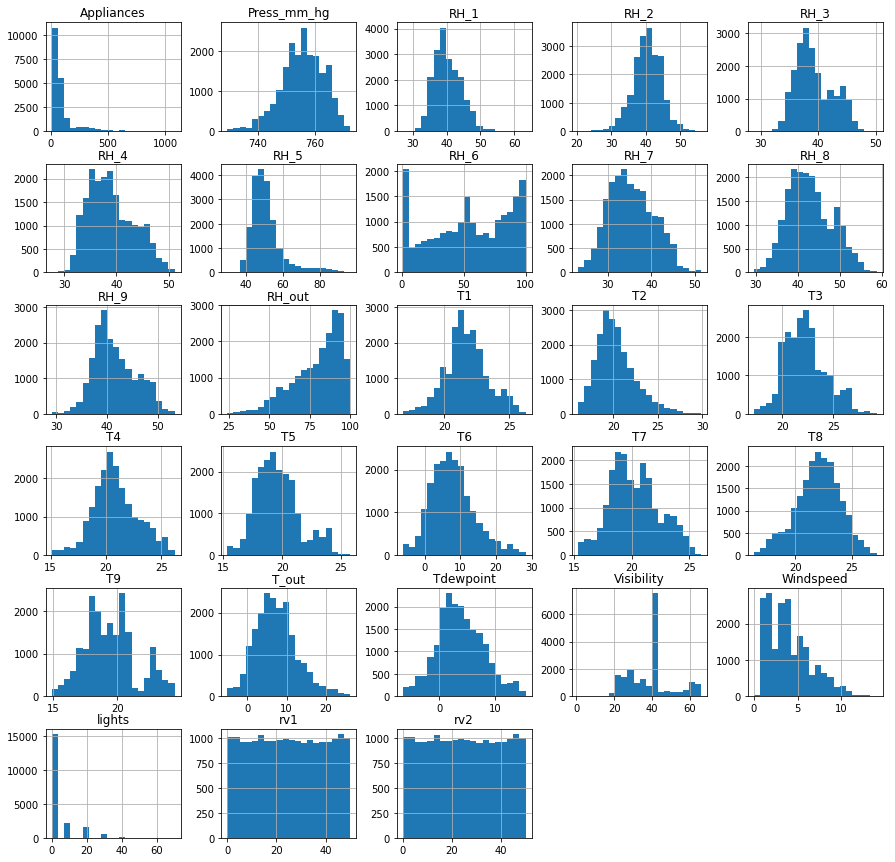

In [15]:
#Create data visualisation to understand the trends, patterns and correlations in every distribution
data.hist(figsize=(15, 15), bins=20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce489ae358>,
      dtype=object)

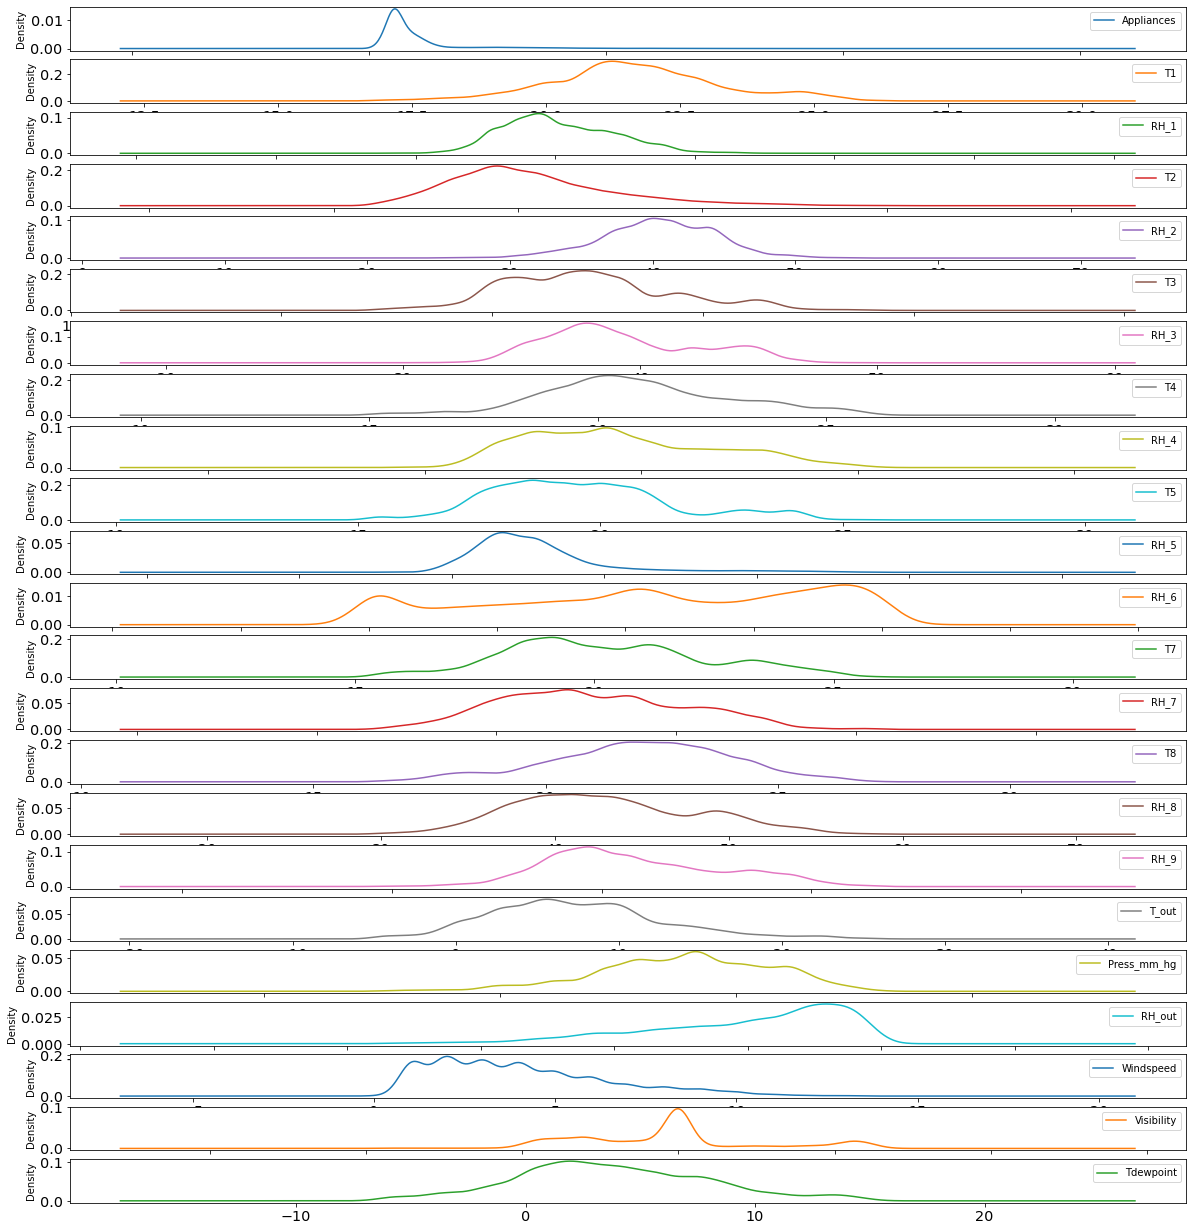

In [51]:
data.plot(kind='density', subplots=True, figsize=(20, 22), fontsize='x-large', sharex=False, sharey=False)

**Observations from Visualisation**

1.   Temperature readings from all the rooms have a normal distribution except for the temperature in parents room (T9).
2.   Humidity readings show that all rooms inside the house follow a normal distribution.
3.   Humidity outside the house does not follow a normal distribution (RH_6 and RH_out)
4.   The data in the visibility, windspeed and appliances columns are skewed towards outliers.
5.   The target variable varies from other columns although windspeed is similarly skewed, the value of data in the y-axes differs.
6.   The visualization of the lights column shows dominant existence of zero values, hence, it can be dropped.
7.   The date column can be dropped as it does not show any relevant data.



In [16]:
# Drop the lights and date column
data.drop(['lights'], axis=1, inplace=True,)
data.drop(['date'], axis=1, inplace=True)

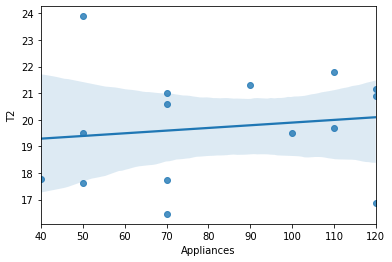

In [157]:
#Test linearility
sns.regplot(x="Appliances", y="T2", data=simple_linear_reg_data)

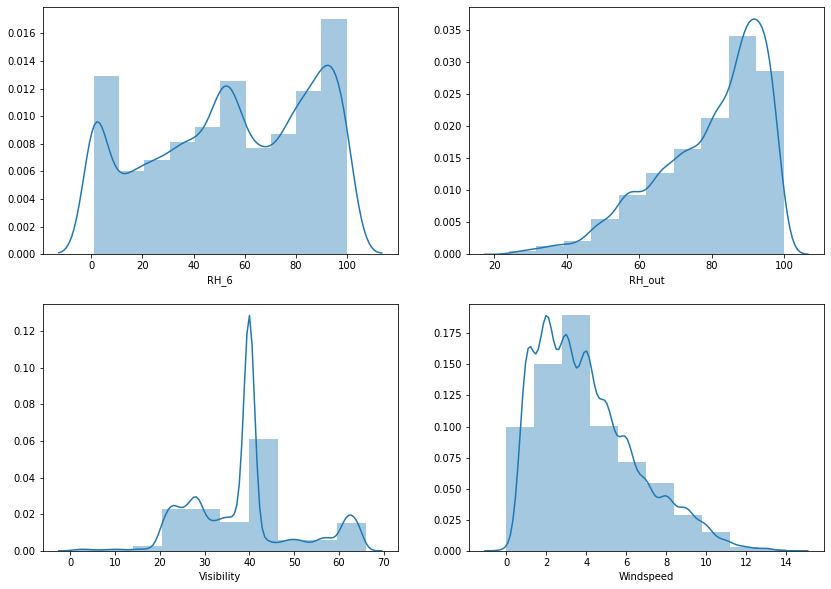

In [17]:
# Focus on columns that do not have a normal distribution
# Create figure and axis
fig, ax = plt.subplots(2,2,figsize=(14,10))
ax1 = sns.distplot(data["RH_6"],  bins=10, ax= ax[0][0])
ax2 = sns.distplot(data["RH_out"],bins=10, ax=ax[0][1])
ax3 = sns.distplot(data["Visibility"],bins=10, ax=ax[1][0])
ax4 = sns.distplot(data["Windspeed"],bins=10, ax=ax[1][1])

Text(0, 0.5, 'Frequency')

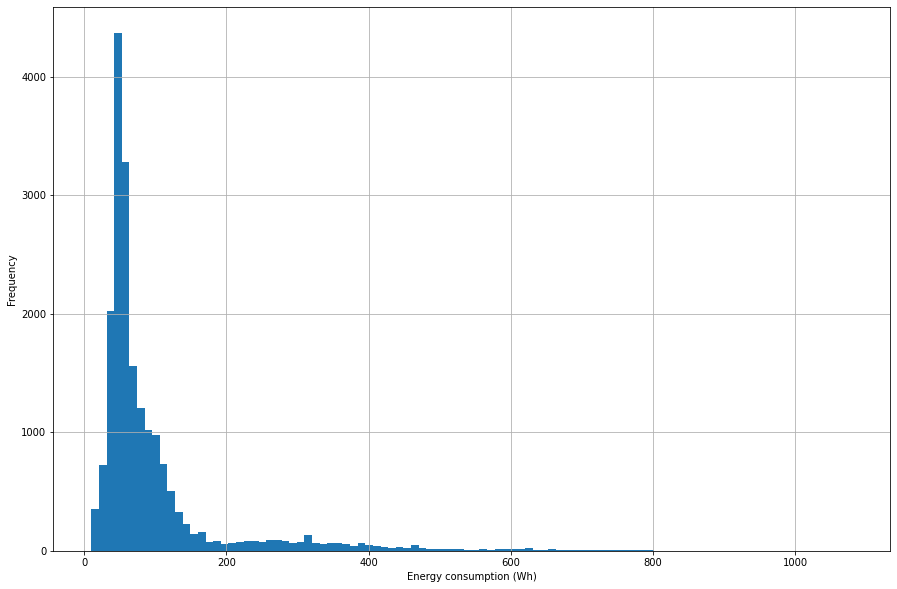

In [18]:
# Visualise the target variable (appliances) to see distribution 
#Plot histogram
data['Appliances'].hist(bins = 100, figsize=(15,10))

#Label axis
plt.xlabel('Energy consumption (Wh)')
plt.ylabel('Frequency')

In [19]:
data.mean()

Appliances      97.694958
T1              21.686571
RH_1            40.259739
T2              20.341219
RH_2            40.420420
T3              22.267611
RH_3            39.242500
T4              20.855335
RH_4            39.026904
T5              19.592106
RH_5            50.949283
T6               7.910939
RH_6            54.609083
T7              20.267106
RH_7            35.388200
T8              22.029107
RH_8            42.936165
T9              19.485828
RH_9            41.552401
T_out            7.411665
Press_mm_hg    755.522602
RH_out          79.750418
Windspeed        4.039752
Visibility      38.330834
Tdewpoint        3.760707
rv1             24.988033
rv2             24.988033
dtype: float64

In [20]:
data.max()

Appliances     1080.000000
T1               26.260000
RH_1             63.360000
T2               29.856667
RH_2             56.026667
T3               29.236000
RH_3             50.163333
T4               26.200000
RH_4             51.090000
T5               25.795000
RH_5             96.321667
T6               28.290000
RH_6             99.900000
T7               26.000000
RH_7             51.400000
T8               27.230000
RH_8             58.780000
T9               24.500000
RH_9             53.326667
T_out            26.100000
Press_mm_hg     772.300000
RH_out          100.000000
Windspeed        14.000000
Visibility       66.000000
Tdewpoint        15.500000
rv1              49.996530
rv2              49.996530
dtype: float64

The Appliances Column is sensitive to outliers and the data is positively skewed because more than 75% of the data fall between the 0.200 Wh range. This makes the mean on the right of the mode.

In [21]:
print(f" Percentage of the appliance energy consumption less than 200 Wh is: {round((data[data['Appliances'] <= 200]['Appliances'].count()) / len(data['Appliances']) * 100, 2)}%")

 Percentage of the appliance energy consumption less than 200 Wh is: 90.29%


**CORRELATION PLOTS**

---

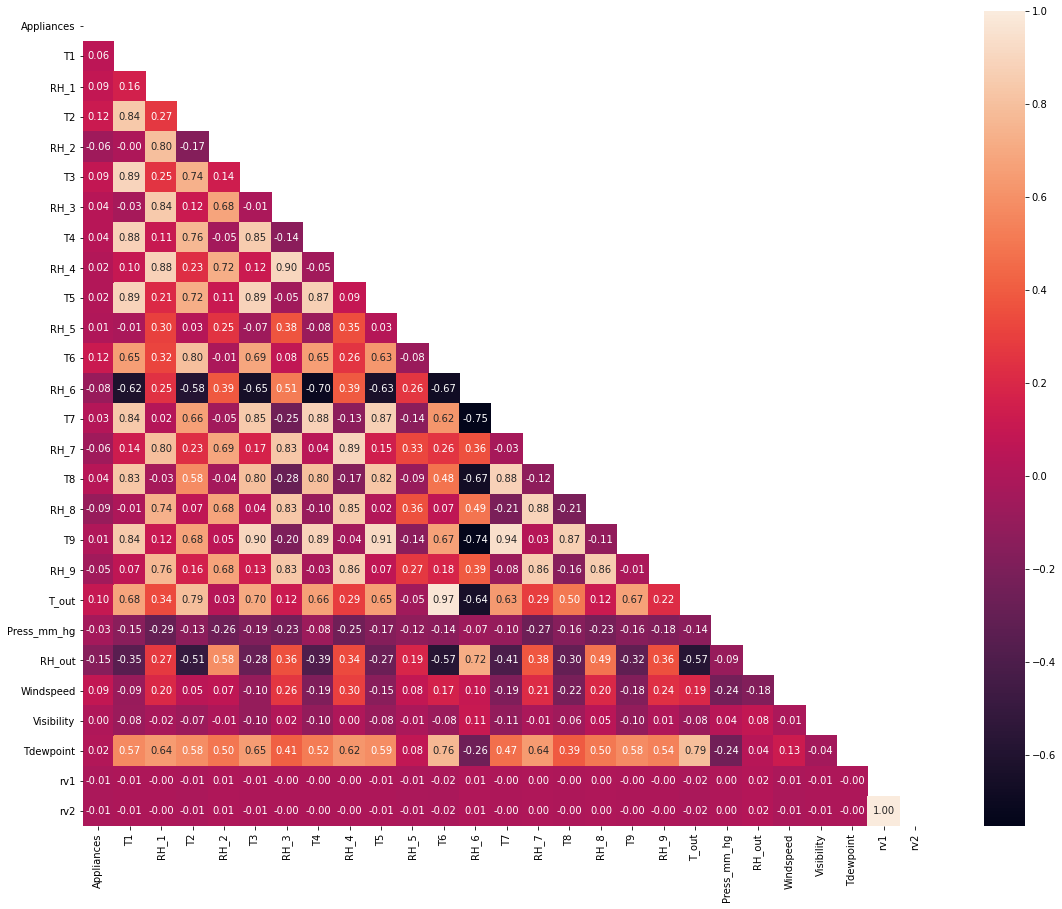

In [22]:
# Correlation Plots of the Appliances, temperature, weather attributes (visibility, Tdewpoint, Press_mm_hg) and random variables column
corr = data.corr()

# Mask repeated values to append new values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(19, 15))

# Generate Heatmap
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask);

[Text(0, 0, 'Appliances'),
 Text(0, 0, 'T1'),
 Text(0, 0, 'RH_1'),
 Text(0, 0, 'T2'),
 Text(0, 0, 'RH_2'),
 Text(0, 0, 'T3'),
 Text(0, 0, 'RH_3'),
 Text(0, 0, 'T4'),
 Text(0, 0, 'RH_4'),
 Text(0, 0, 'T5'),
 Text(0, 0, 'RH_5'),
 Text(0, 0, 'RH_6'),
 Text(0, 0, 'T7'),
 Text(0, 0, 'RH_7'),
 Text(0, 0, 'T8'),
 Text(0, 0, 'RH_8'),
 Text(0, 0, 'RH_9'),
 Text(0, 0, 'T_out'),
 Text(0, 0, 'Press_mm_hg'),
 Text(0, 0, 'RH_out'),
 Text(0, 0, 'Windspeed'),
 Text(0, 0, 'Visibility'),
 Text(0, 0, 'Tdewpoint')]

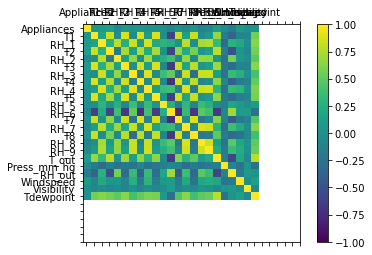

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,29,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

In [23]:
def get_redundant_pairs(data):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [24]:
# Create function to get top correlations

def get_top_abs_correlations(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [25]:
# Get top correlations
print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974787
T7    T9       0.944776
T5    T9       0.911055
T3    T9       0.901324
RH_3  RH_4     0.898978
RH_4  RH_7     0.894301
T1    T3       0.892402
T4    T9       0.889439
T3    T5       0.888169
T1    T5       0.885247
RH_7  RH_8     0.883984
T7    T8       0.882123
RH_1  RH_4     0.880359
T4    T7       0.877763
T1    T4       0.877001
T4    T5       0.871813
T5    T7       0.870624
T8    T9       0.869338
RH_7  RH_9     0.858686
RH_4  RH_9     0.856591
RH_8  RH_9     0.855812
T3    T4       0.852778
      T7       0.847374
RH_4  RH_8     0.847259
T1    T9       0.844777
RH_1  RH_3     0.844677
T1    T7       0.838705
      T2       0.836834
RH_3  RH_9     0.833538
      RH_7     0.832685
      RH_8     0.828822
T1    T8       0.825413
T5    T8       0.824981
T2    T6       0.801186
RH_1  RH_7     0.801122
      RH_2     0.797535
T4    T8       0.796256
T3    T8       0.795283
T2    T_out    0.792255
dtype: float64

In [26]:
# Compare correlation of columns with the target columns
cor_matrix = data.corr()
cor_matrix['Appliances']

Appliances     1.000000
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64

**Correlation plot observation**
1. All the temperature variables; T1,T2,T3,T4,T5,T6,T7,T8,T9 and T_out have positive correlation with Appliances
2. Columns T3,T5,T7 and T8 have a higher degree of correlation with T9.
3. The temperatures outside the building have high correlation (Columns T6 and T_Out).
4. Weather attributes have low correlation values.

5. The random variables have no correlation

**Conclusions**
1. The temperature columns outside the building can be dropped because the other temperatures from inside the house provide sufficient data.

2. The random variables do no affect the dataset and can be dropped

**DATA PREPROCESSING**

---

In [27]:
# Drop outside temperature and random variables columns
data.drop(['T6', 'T9', 'rv1', 'rv2'], axis=1, inplace=True)

In [28]:
# Transform features by scaling each feature to a given range
#Normalise dataset to a common scale using the MinMaxScaler
scaler = MinMaxScaler()

# normalise features
normalised_features = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [29]:
# Split data into independent and dependent variables
# Independent Variables
features = normalised_features.drop(columns=['Appliances'], axis=1)

# Dependent Variable
target = normalised_features['Appliances']

In [30]:
# Split dataset into training and testing dataset from the segmented features and target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

print(f'shape of training set is {X_train.shape}')
print(f'shape of testing set is {X_test.shape}')

shape of training set is (13814, 22)
shape of testing set is (5921, 22)


**MODELLING**

---
We will be comparing the LinearRegressor with other algorithm models to see if they offer improvements

In [31]:
# Import required algorithms for linear regression models
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# create a dictionary of different algorithms 
models = {'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet':ElasticNet(),
        'LinearRegression':LinearRegression(),
        'KNeighborsRegressor':KNeighborsRegressor(),
        'RandomForestRegressor':RandomForestRegressor(),
        'ExtraTreesRegressor':ExtraTreesRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor()}

In [32]:
# Create function to compute the train score, test score, MSE, MAE, RMSE and time on the training and testing set
def pipeline(models, X_train, X_test, y_train, y_test):
    
    # store properties of each model
    prop = []
    
    # loop through the dictionary of models
    for reg_name, regressor in models.items():
        # empty dict for storing properties of each models
        reg_dict = {}
        # store the name of each model
        reg_dict['Name'] = reg_name
        # fit the regressor model
        regressor.fit(X_train, y_train)
        # compute the Train_score
        reg_dict['Train_score'] = regressor.score(X_train, y_train)
        # compute the test scores
        reg_dict['Test_score'] = regressor.score(X_test, y_test)
        # compute the mean_absolute_error
        reg_dict['MAE'] = mean_absolute_error(y_test, regressor.predict(X_test))
        #compute the mean_squared_error
        reg_dict['MSE'] = mean_squared_error(y_test, regressor.predict(X_test))
        # compute the RMSE
        reg_dict['RMSE'] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
        # append the properties of a single regressor to the prop list
        prop.append(reg_dict)
     
    # create a dataframe with a list of all the model properties
    summary_data = pd.DataFrame(prop)
    
    # plot a bar chart to visualize the performance of each model
    summary_data.plot(x='Name', y=['Train_score', 'Test_score', 'MAE', 'MSE', 'RMSE'], kind='bar', figsize=(15,10),
               title='Performance scores of different models')
        
        
    return summary_data

,Name,Train_score,Test_score,MAE,MSE,RMSE
0,Ridge,0.133170,0.133595,0.050657,0.007797,0.088298
1,Lasso,0.000000,-0.000001,0.056523,0.008999,0.094862
2,ElasticNet,0.000000,-0.000001,0.056523,0.008999,0.094862
3,LinearRegression,0.133898,0.134637,0.050703,0.007787,0.088245
4,KNeighborsRegressor,0.667955,0.475049,0.032099,0.004724,0.068730
5,RandomForestRegressor,0.937680,0.566329,0.029402,0.003902,0.062470
6,ExtraTreesRegressor,1.000000,0.638189,0.026055,0.003256,0.057060
7,GradientBoostingRegressor,0.332337,0.238160,0.045356,0.006856,0.082798
8,DecisionTreeRegressor,1.000000,0.204724,0.035787,0.007156,0.084596


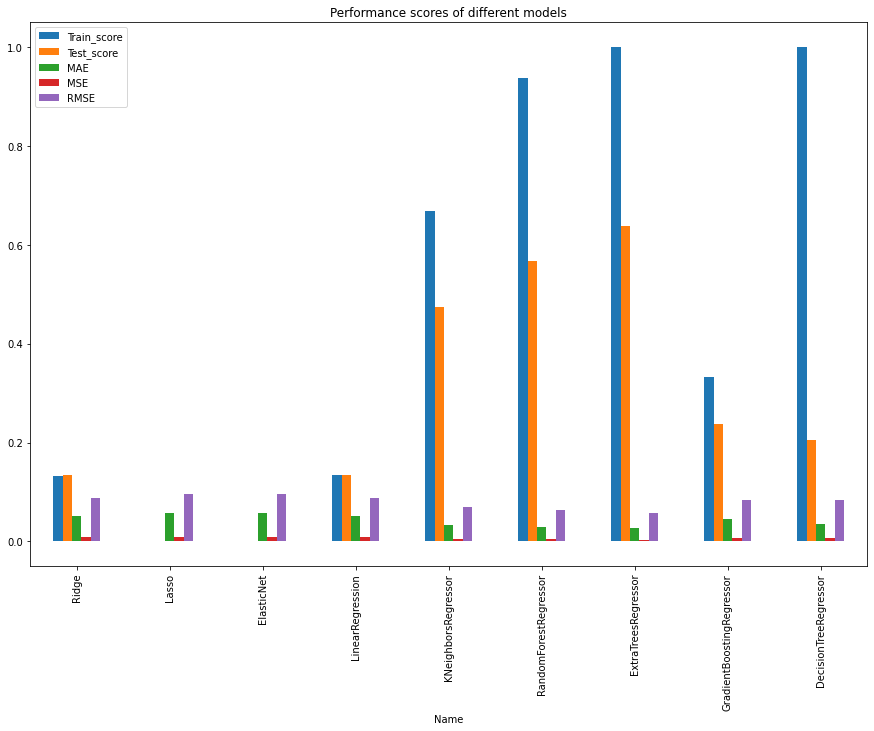

In [33]:
#Execute the function to test effectiveness

pipeline(models, X_train, X_test, y_train, y_test)

****

**Observations from modeling**
1. The best performing model is ExtraTreesRegressor because it has the lowest scores on evaluation metrics and the highest scores in training and testing set. They can be further explored and their Hyperparameters tuned.

2. Lasso regularisation was the worst performing model.

3. Some algorithms have very high variance and low bias like the DecisioonTreeRegressor

4. RandomForestRegressor and ExtraTreesRegressor have good balance between variance and bias

**HYPERPARAMETER TUNING**
Hyperparameters have to be tuned to obtain the lowest possible bias and variance of the ExtraTreesRegressor and the RandomForestRegressor since these two have the best balance.

In [34]:
# EXTRATREESREGRESSOR HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# define the param grid
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [10, 50, 100, 200, 250],
              'max_features': ["auto", "sqrt", "log2"]
            }]

reg = ExtraTreesRegressor(random_state=42)

# Instantiate the grid search model
grid_search = RandomizedSearchCV(reg, param_grid, cv = 6, n_jobs = -1 , scoring='r2' , verbose=2)

# fit the gridsearch model with training data
grid_search.fit(X_train, y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.8min finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

In [53]:
# Find best parameters for the best balanced algorithm; ExtraTreesRegressor
print(f'best param for the ExtraTreesRegressor is: {grid_search.best_params_}')

best param for the ExtraTreesRegressor is: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 250}


In [56]:
# Find best possible estimator for ExtraTreesRegressor
best_model = grid_search.best_estimator_

print(f'print R2_score on training_set with tuned parameters: {best_model.score(X_train, y_train)}')
print(f'print R2_score on testing_set with tuned parameters: {round(best_model.score(X_test, y_test), 3)}')
print(f'print MSE_score on testing_set with tuned parameters: {round(mean_squared_error(y_test, best_model.predict(X_test)), 3)}')
print(f'print RMSE_score on testing_set with tuned parameters: {round(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))), 3)}')

print R2_score on training_set with tuned parameters: 1.0
print R2_score on testing_set with tuned parameters: 0.641
print MSE_score on testing_set with tuned parameters: 0.003
print RMSE_score on testing_set with tuned parameters: 0.057


**Obeservation from ExtraTreesRegressor Hyperparameter Tuning**

---

Tuned model of the ExtraTreesRegressor explained 64.2% of the variance in the testing *set*

In [60]:
# RANDOMFORESTREGRESSOR HYPERPARAMETER TUNING
# Define the param grid
param_grid = [
 {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 10],
  'max_depth':[10, 15]},
 {'bootstrap': [False], 'n_estimators': [1, 3, 10], 'max_features': [2, 3, 4]},
 ]

# Instantiate the RandomForestRegressor
forest_reg = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(forest_reg, param_grid, cv=6, scoring='r2')

# Fit the gridsearch model with training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [65]:
# Find best parameters for the best balanced algorithm; ExtraTreesRegressor
print(f'best param for the RandomForestRegressor is: {grid_search.best_params_}')

best param for the RandomForestRegressor is: {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}


In [164]:
# Find best possible estimator for ForestRegressor
best_model = grid_search.best_estimator_

print(f'R2_score on training_set with tuned parameters: {best_model.score(X_train, y_train)}')
print(f'R2_score on testing_set with tuned parameters: {round(best_model.score(X_test, y_test), 3)}')
print(f'MSE_score on testing_set with tuned parameters: {round(mean_squared_error(y_test, best_model.predict(X_test)), 3)}')
print(f'RMSE_score on testing_set with tuned parameters: {round(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test))), 3)}')

R2_score on training_set with tuned parameters: 1.0
R2_score on testing_set with tuned parameters: 0.575
MSE_score on testing_set with tuned parameters: 0.004
RMSE_score on testing_set with tuned parameters: 0.062


**Observation from RandomForestRegressor Hyperparameter Tuning**

---
Tuned model of the RandomForestRegressor explained 58.1% of the variance in the testing set


In [ ]:
linear_model = LinearRegression()
# FIt the model to the training dataset
linear_model.fit(X_train, y_train)

# Obtain predictions
predicted_values = linear_model.predict(X_test)

In [ ]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(linear_model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [122]:
linear_model_weights = get_weights_df(linear_model, X_train, 'Linear_Model_Weight')
ExtraTrees_weights_df = get_weights_df(ExtraTreesRegressor, X_train, 'Trees_Weight')
RandomForest_weights_df = get_weights_df(RandomForestRegressor, X_train, 'Forest_weight')
Lasso_weights_df = get_weights_df(Lasso, X_train, 'Lasso_Weight')
Ridge_weights_df = get_weights_df(Ridge, X_train, 'Ridge_weight')

final_weights = pd.merge(linear_model_weights, ExtraTrees_weights_df, on='Features')
final_weights = pd.merge(final_weights, RandomForest_weights_df, on='Features')
final_weights = pd.merge(final_weights, Lasso_weights_df, on='Features')
final_weights = pd.merge(final_weights, Ridge_weights_df, on='Features')

final_weights

,Features,Linear_Model_Weight,Trees_Weight,Forest_weight,Lasso_Weight,Ridge_weight
0,RH_2,-0.495149,-0.495149,-0.495149,-0.495149,-0.495149
1,T2,-0.210959,-0.210959,-0.210959,-0.210959,-0.210959
2,RH_8,-0.176274,-0.176274,-0.176274,-0.176274,-0.176274
3,T_out,-0.080632,-0.080632,-0.080632,-0.080632,-0.080632
4,T7,-0.078414,-0.078414,-0.078414,-0.078414,-0.078414
5,T5,-0.076730,-0.076730,-0.076730,-0.076730,-0.076730
6,RH_out,-0.057192,-0.057192,-0.057192,-0.057192,-0.057192
7,RH_9,-0.051523,-0.051523,-0.051523,-0.051523,-0.051523
8,RH_7,-0.014704,-0.014704,-0.014704,-0.014704,-0.014704
9,T1,-0.001686,-0.001686,-0.001686,-0.001686,-0.001686


**OVERALL OBSERVATION FROM HYPERPARAMETER TUNNING**
**(Compare Effect of Regularisation)**
---
*ExtraTreesRegressor*
'n_estimators': 200, 'max_features': 'log2', 'max_depth': 250
Training set R2 score of 1.0 is the same with the untuned model.
Test set R2 score of 0.641 shows an improvement over 0.639 achieved using untuned model.
Test set MSE score remains the same with the untuned model.
Test set RMSE score of 0.057 is the same with the untuned model



*RandomForestRegressor*
Best possible parameter combinations are - 'bootsraps': False, 'max_features': 2, 'n_estimators': 10
Training set R2 score of 1.0 may be signal of overfitting on training set because of the large difference with untuned model.
Test set R2 score of 0.58 is an improvement over 0.56 achieved using untuned model.
Test set MSE score remains the same with the untuned model.
Test set RMSE score of 0.061 is an improvement over 0.63 achieved using untuned model.


**Feature Importance**

---


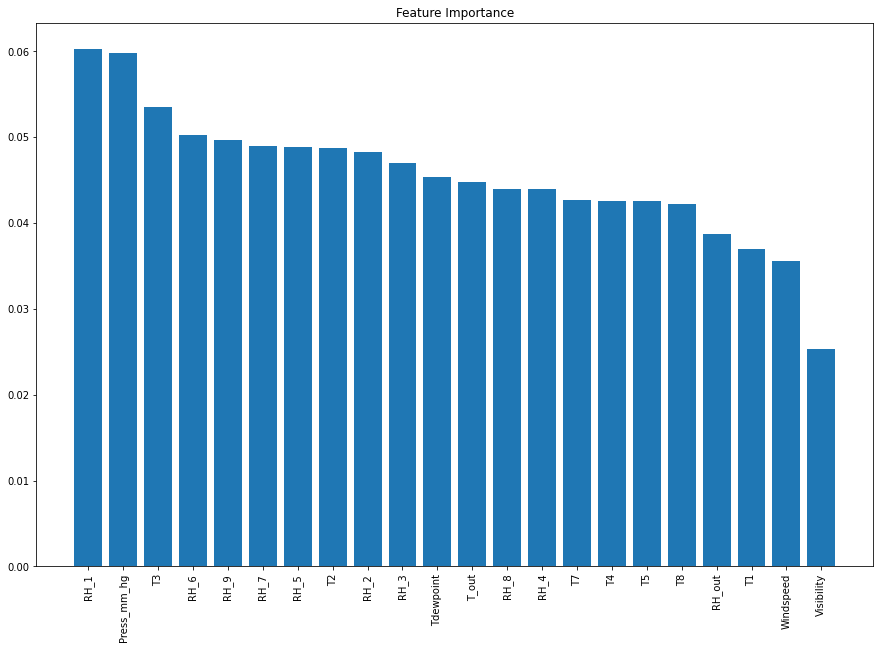

In [67]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)
feature_importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [X_train.columns[i] for i in indices]

# Create plot for the features
plt.figure(figsize=(15, 10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), feature_importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [68]:
# Get top 10 most important features
names[0:10]

['RH_1',
 'Press_mm_hg',
 'T3',
 'RH_6',
 'RH_9',
 'RH_7',
 'RH_5',
 'T2',
 'RH_2',
 'RH_3']

In [96]:
nunu = names[0:10]

In [69]:
# Reduce the testing and training set to the top 10 feature set
train_important_feature = X_train[names[0:10]]
test_important_feature = X_test[names[0:10]]

In [70]:
# Clone the gridsearch model with its parameters and fit on the new features dataset
from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [71]:
# Reduce the statistical scores of the dataset
print('Training set R2 Score - ', r2_score(y_train, cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', r2_score(y_test, cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(y_test, cloned_model.predict(test_important_feature))))


Training set R2 Score -  1.0
Testing set R2 Score -  0.5560375622919675
Testing set RMSE Score -  0.06320671389200866


**Observation**
1. The top ten most important frature columns are 'RH_1', 'Press_mm_hg', 'T3', 'RH_6', 'RH_9', 'RH_7', 'RH_5', 'T2', 'RH_2', 'RH_3'

2. The feature reduction has not improved the R2 score, it has reduced to 0.55. It will be better to use the original R2 score and not the feature improved dataset

**Conclusion**
The best algorithm for the dataset  is the ExtraTreesRegressor because there was an improvement from 62% to 64% explanation of variance. The RandomForestRegressor on the other hand improved by only 1%.
